<div>
    <div style="float:left;width:50%;text-align:center">
        <h1>pyGIMLi Tutorial @ Transform 2021</h1>
        <div>
<table style="border-collapse:collapse;border-color:#ccc;border-spacing:0" class="tg"><thead><tr><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal"></th><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Info</th></tr></thead><tbody><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">When</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Monday, April 19 • 8:00 - 10:00 UTC (starts at 10.00 a.m. CET)</td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Slack (Q&amp;A)</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://softwareunderground.org/">Software Underground</a> channel <a href="https://swung.slack.com/archives/C01T5V5S9EV">#t21-mon-pygimli</a></td></tr><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Live stream</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://youtu.be/w3pu0H3dXe8">https://youtu.be/w3pu0H3dXe8</a></td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">pyGIMLi documentation</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://www.pygimli.org/documentation.html">https://www.pygimli.org/documentation.html</a></td></tr></tbody></table>
        </div>
    </div>
    <div style="float:right;width:30%">
        <img src="https://www.pygimli.org/_images/pg_logo.png" alt="pyGIMLi logo">
    </div>
</div>

# Introduction to method managers: Traveltime inversion

In [1]:
# Just some plotting settings
import matplotlib.pyplot as plt
plt.style.use("seaborn-notebook")
%config InlineBackend.figure_format='svg' # Setting figure format for this notebook

In [2]:
import numpy as np
import pygimli as pg
import pygimli.physics.traveltime as tt

In [3]:
data = tt.load("traveltime.dat")
print(data)

Data: Sensors: 20 data: 100, nonzero entries: ['err', 'g', 's', 't', 'valid']


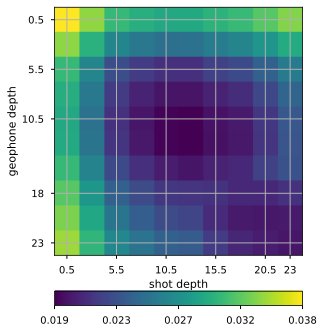

In [4]:
# For displaying data we define a function
from pygimli.viewer.mpl import showVecMatrix
def showCrossholeData(data, vals, **kwargs):
    d = -pg.y(data)  # sensor depth
    ds = d[data["s"]]  # shot depth
    dg = d[data["g"]]  # geophone depth
    ax, cb = showVecMatrix(ds, dg, vals, );
    ax.set_xlabel("shot depth");
    ax.set_ylabel("geophone depth");

showCrossholeData(data, data["t"], label="travel time (s)")

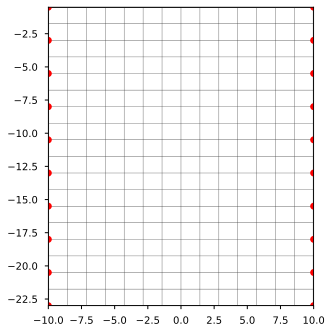

In [17]:
x = np.linspace(min(pg.x(data)), max(pg.x(data)), 15)
y = np.linspace(min(pg.y(data)), max(pg.y(data)), 19)
grid = pg.meshtools.createMesh2D(x, y)
ax, cb = pg.show(grid)
ax.plot(pg.x(data), pg.y(data), "ro");

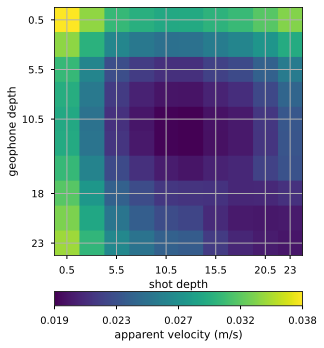

In [19]:
# For displaying data we define a function
from pygimli.viewer.mpl import showVecMatrix
def showCrossholeData(data, vals):
    d = -pg.y(data)  # sensor depth
    ds = d[data["s"]]  # shot depth
    dg = d[data["g"]]  # geophone depth
    ax, cb = showVecMatrix(ds, dg, vals, label="apparent velocity (m/s)");
    ax.set_xlabel("shot depth");
    ax.set_ylabel("geophone depth");

showCrossholeData(data, data["t"])

In [20]:
mgr = tt.TravelTimeManager(data)

18/04/21 - 20:53:31 - pyGIMLi - INFO - Found 1 regions.
18/04/21 - 20:53:31 - pyGIMLi - INFO - Creating forward mesh from region infos.
18/04/21 - 20:53:31 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
18/04/21 - 20:53:31 - pyGIMLi - INFO - Startmodel set from given value. 0.0002
18/04/21 - 20:53:31 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.TravelTimeManager.TravelTimeDijkstraModelling object at 0x0000021821EDCA90>
Data transformation: <pgcore._pygimli_.RTrans object at 0x0000021821EDC950>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000021820A09400>
min/max (data): 0.019/0.038
min/max (error): 0.13%/0.15%
min/max (start model): 2.0e-04/2.0e-04
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 38952.05 (dPhi = 81.43%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 15973.11 (dPhi = 58.99%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 4902.68 (dPhi = 69.3%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 3149.23 (dPhi = 35.76%) 

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x218234b0b80>)

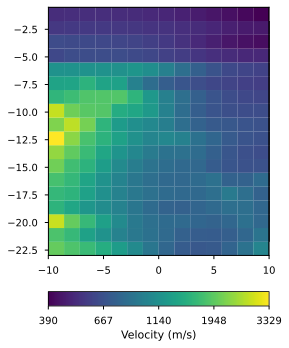

In [26]:
mgr.invert(data, mesh=grid, 
           startModel= 0.0002,
           zWeight=1,
           verbose=True)
mgr.showResult()